In [2]:
from preprocessing import (
    preprocess_kjv,
    get_word_types_with_tf_idf,
    get_gospel_top_70_words_dictionary,
)
from extract_relations import (
    get_directed_relations,
    order_directed_relations,
)
from ontology_algorithm import (
    construct_ontology_hierarchy,
    print_hierarchy_tree_from_ontology,
    draw_hierarchy_tree_from_ontology,
)
from topic_modeling import (
    kmeans_tfidf_clustering,
)
import re

## Preprocessing

We will preprocess words from the theology reconsidered text using tf-idf and extract the top n words.

In [3]:
kjv_path = "/Users/zebo/Documents/Freelancing/upwork/Peter_J_Worth_Jr/NLP/hierarchical_clustering/data/t_kjv.csv"
kjv_bible_df = preprocess_kjv(
    path_to_kjv=kjv_path,
)

# Get book column unique values.
all_books = kjv_bible_df["book"].unique()

# Specify the number of top words to use.
n = 70

books = []
for book in all_books:
    book_df = kjv_bible_df[kjv_bible_df["book"] == book]
    book_text = ""
    for chapter in book_df["chapter"].unique():
        chapter_df = book_df[book_df["chapter"] == chapter]
        book_text += " ".join(chapter_df["text"].values)
    books.append(" ".join(chapter_df["text"].values))


titles = all_books
chapters = books

## Perform topic modeling

In [4]:
NUM_TOPICS = 6
clusters, key_terms_per_cluster = kmeans_tfidf_clustering(
    chapters=chapters,
    num_topics=NUM_TOPICS,
)

CLUSTER #1
Cluster Chapters: [1, 2, 18, 19, 20, 21, 26, 27, 28, 30, 31, 32, 33, 34, 35, 58, 65]
Key Features: ['shall', 'thy', 'thou', 'lord', 'thee', 'praise', 'upon', 'unto', 'let', 'shalt', 'ye', 'god', 'day', 'thine', 'estimation', 'thou shalt', 'earth', 'man', 'fruit', 'tabernacle', 'even', 'thy estimation', 'jonah', 'return', 'set', 'people', 'hands', 'end', 'come', 'time', 'holy', 'behold', 'tree', 'bring', 'book', 'tent', 'light', 'thereof', 'drink', 'neither', 'gourd', 'said', 'didst', 'thou didst', 'midst', 'like', 'would', 'many', 'away', 'river', 'tent congregation', 'words', 'things', 'unto lord', 'strong', 'saith', 'make', 'put', 'strength', 'mine', 'wise', 'days', 'iniquity', 'one', 'head', 'say', 'jerusalem', 'take', 'every', 'forth', 'heard', 'lebanon', 'zion', 'wine', 'waters', 'nations', 'shouldest', 'esau', 'heathen', 'thou hast', 'sun', 'hand', 'angry', 'estimation shall', 'children']
CLUSTER #2
Cluster Chapters: [0, 3, 4, 5, 6, 7, 8, 9, 12, 14, 17, 24, 25, 61]
Key

## Find top_n_words using tf

In [5]:
# Specify the chapters used in the analysis.
chosen_cluster = 1

chosen_chapters = clusters[chosen_cluster]
chosen_books = [titles[idx] for idx in chosen_chapters]

key_terms = key_terms_per_cluster[chosen_cluster]

print("Chosen chapters ", chosen_chapters)

# Specify the number of top words to use.
n = 50

text_per_chapter = []
for chapter_idx in chosen_chapters:
    text_per_chapter.append(chapters[chapter_idx])

tf_idf_pre_filtering = get_word_types_with_tf_idf(
    text_per_chapter,
    "tf",
    skip_stopwords=True,
    include_verbs=False,
    include_determiners=False,
    include_pronouns=False,
    include_adverbs=False,
    include_numbers=False,
)

top_n_words = tf_idf_pre_filtering.head(n)["word"].values

# See difference between top words and key terms.
print("Top words: ", top_n_words)
print("Key terms: ", key_terms)
print("Overlap: ", set(top_n_words).intersection(set(key_terms)))
print("Symmetric difference: ", set(top_n_words).symmetric_difference(set(key_terms)))

Chosen chapters  [1, 2, 18, 19, 20, 21, 26, 27, 28, 30, 31, 32, 33, 34, 35, 58, 65]
Top words:  ['shall' 'lord' 'thy' 'unto' 'upon' 'day' 'god' 'man' 'estimation'
 'tabernacle' 'thy estimation' 'people' 'things' 'earth' 'moses' 'men'
 'house' 'time' 'children' 'tent' 'priest' 'hands' 'land' 'field' 'fruit'
 'congregation' 'israel' 'altar' 'years' 'hand' 'among' 'end' 'days'
 'like' 'book' 'jerusalem' 'many' 'good' 'light' 'midst' 'old' 'nations'
 'would' 'silver' 'great' 'may' 'shekels' 'words' 'head' 'none']
Key terms:  ['shall', 'thy', 'thou', 'lord', 'thee', 'praise', 'upon', 'unto', 'let', 'shalt', 'ye', 'god', 'day', 'thine', 'estimation', 'thou shalt', 'earth', 'man', 'fruit', 'tabernacle', 'even', 'thy estimation', 'jonah', 'return', 'set', 'people', 'hands', 'end', 'come', 'time', 'holy', 'behold', 'tree', 'bring', 'book', 'tent', 'light', 'thereof', 'drink', 'neither', 'gourd', 'said', 'didst', 'thou didst', 'midst', 'like', 'would', 'many', 'away', 'river', 'tent congregation

In [6]:
tf_idf_pre_filtering.head(n)

,word,word_type,tc,tf,dc,idf,tf_idf
0,shall,"{'MD': 213, 'NN': 1}",214,0.025091,15,0.125163,0.003140
1,lord,"{'NNP': 92, 'ORGANIZATION': 84, 'NN': 1, 'PERS...",93,0.010904,15,0.125163,0.001365
2,thy,"{'JJ': 74, 'VBZ': 2, 'NN': 4, 'NNP': 3, 'PERSO...",84,0.009849,13,0.268264,0.002642
4,unto,"{'NN': 2, 'IN': 46, 'VB': 2, 'JJ': 14, 'VBP': 1}",65,0.007621,15,0.125163,0.000954
6,upon,{'IN': 41},41,0.004807,13,0.268264,0.001290
7,day,{'NN': 32},32,0.003752,12,0.348307,0.001307
9,god,"{'NNP': 29, 'PERSON': 8, 'ORGANIZATION': 4}",29,0.003400,10,0.530628,0.001804
10,man,{'NN': 27},27,0.003166,9,0.635989,0.002013
18,estimation,{'NN': 19},19,0.002228,1,2.833213,0.006312
19,tabernacle,{'NN': 18},18,0.002110,1,2.833213,0.005979


# Extract relations from the corpus

In [7]:
# Create a list of all verses of the chosen books.
all_verses = []
for book in chosen_books:
    book_df = kjv_bible_df[kjv_bible_df["book"] == book]
    for chapter in book_df["chapter"].unique():
        chapter_df = book_df[book_df["chapter"] == chapter]
        for verse in chapter_df["text"].values:
            all_verses.append(verse)

In [8]:
import spacy

nlp = spacy.load("en_core_web_lg")
doc_1 = nlp(all_verses[98])
spacy.displacy.render(doc_1, style="dep", jupyter=True)

In [9]:
directed_relations, relations_to_verbs = get_directed_relations(
    top_n_words=top_n_words,
    all_verses=all_verses,
    verbose=False,
)

In [10]:
ordered_directed_relations = order_directed_relations(
    directed_relations=directed_relations,
    tf_idf_pre_filtering=tf_idf_pre_filtering,
    order_by="product",
    include_ordering_wrt_occurences=True,
    verbose=False,
)

## Construct the ontology hierarchy

In [11]:
ontology_hierarchy, words_with_parents = construct_ontology_hierarchy(
    ordered_directed_relations=ordered_directed_relations,
)
# print_hierarchy_tree_from_ontology(
#     ontological_hierarchy=ontology_hierarchy,
#     words_with_parents=words_with_parents,
# )

In [12]:
# draw_hierarchy_tree_from_ontology(
#     ontological_hierarchy=ontology_hierarchy,
#     relations_to_verbs=relations_to_verbs,
# )

## Run for all parts of the text

Cluster: # 1
Chosen chapters 

Exodus
Leviticus
Psalms
Proverbs
Ecclesiastes
Song of Solomon (Canticles)
Daniel
Hosea
Joel
Obadiah
Jonah
Micah
Nahum
Habakkuk
Zephaniah
James
Revelation


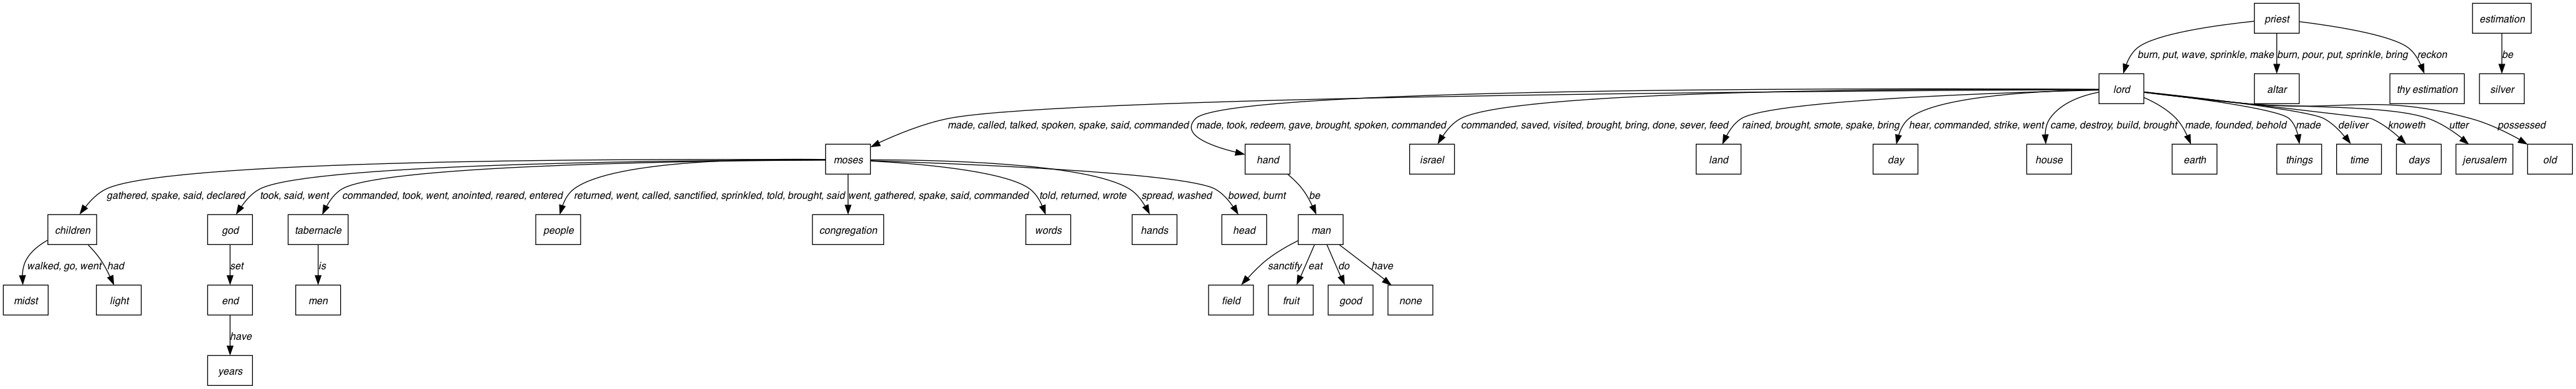

Cluster: # 2
Chosen chapters 

Genesis
Numbers
Deuteronomy
Joshua
Judges
Ruth
1 Samuel (1 Kings)
2 Samuel (2 Kings)
1 Chronicles
Ezra
Job
Lamentations
Ezekiel
1 John


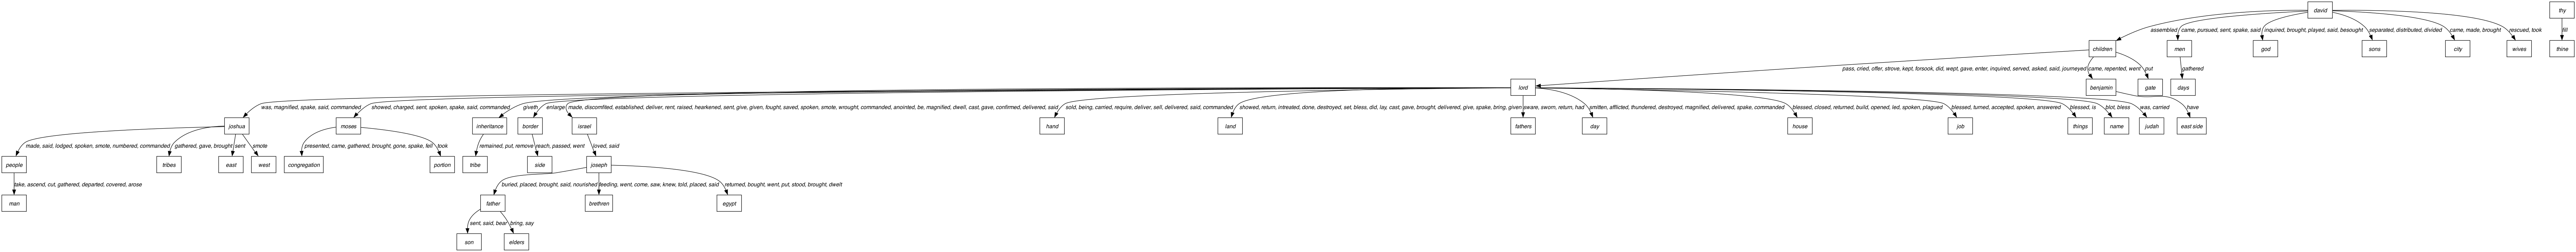

Cluster: # 3
Chosen chapters 

Isaiah
Amos
Haggai
Zechariah
Malachi
John


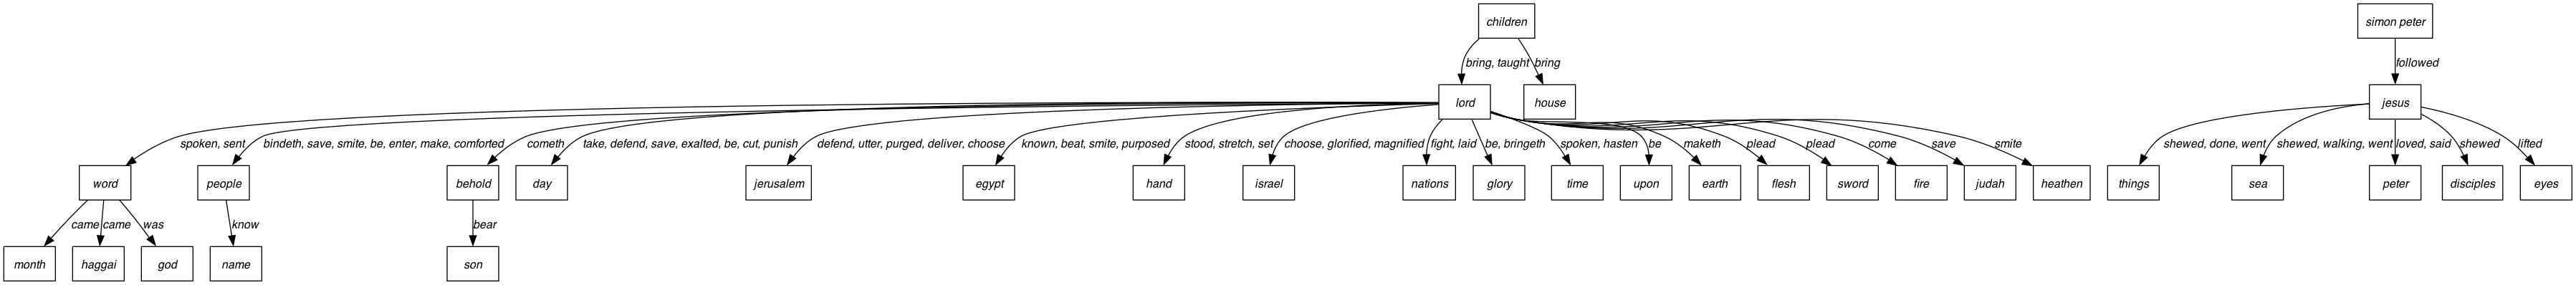

Cluster: # 4
Chosen chapters 

Matthew
Mark
Luke
Acts
2 Peter


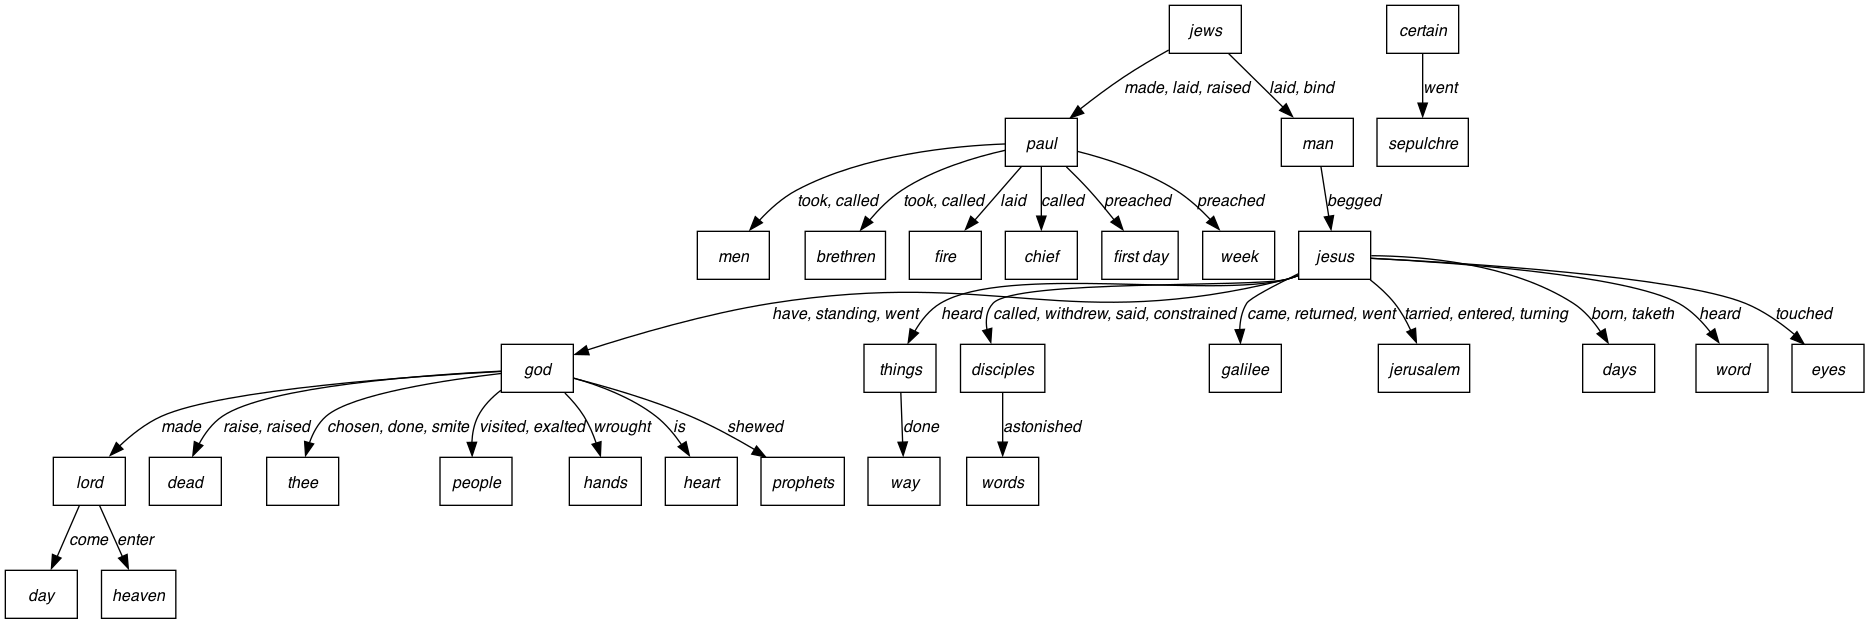

Cluster: # 5
Chosen chapters 

Romans
1 Corinthians
2 Corinthians
Galatians
Ephesians
Philippians
Colossians
1 Thessalonians
2 Thessalonians
1 Timothy
2 Timothy
Titus
Philemon
Hebrews
1 Peter
2 John
3 John
Jude


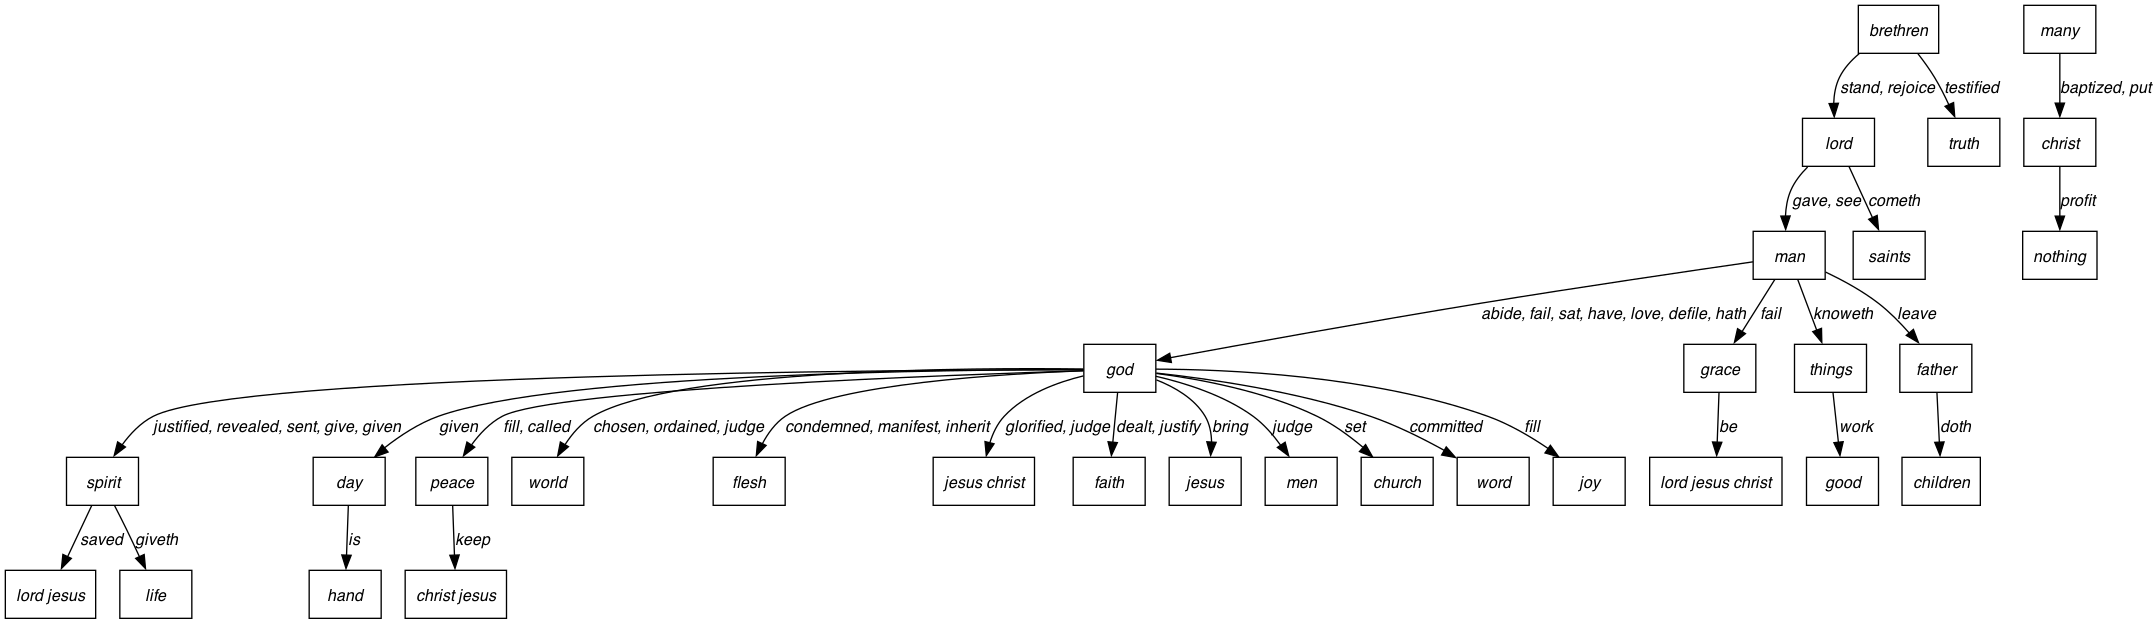

Cluster: # 6
Chosen chapters 

1 Kings (3 Kings)
2 Kings (4 Kings)
2 Chronicles
Nehemiah
Esther
Jeremiah


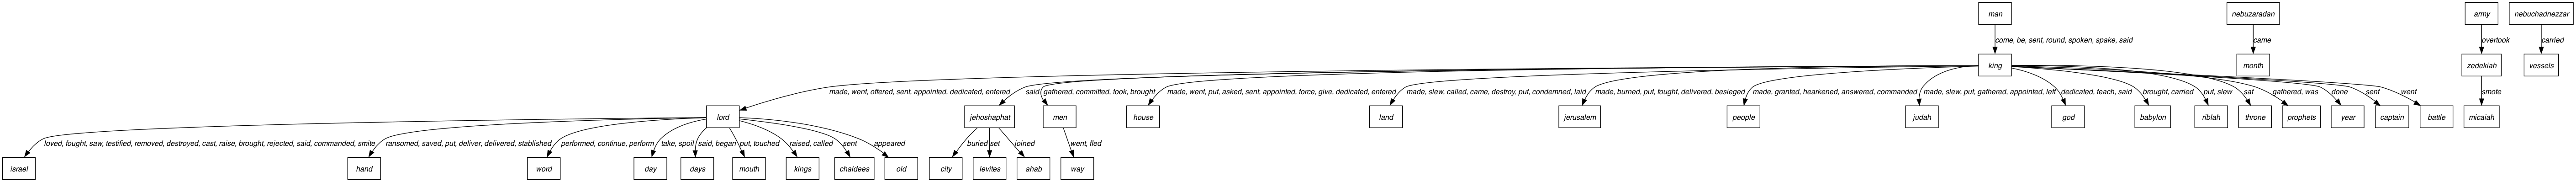

In [13]:
# Specify the chapters used in the analysis.
for cluster in range(1, NUM_TOPICS + 1):
    print("Cluster: #", cluster)
    chosen_chapters = clusters[cluster]

    chosen_books = [titles[i] for i in chosen_chapters]
    print("Chosen chapters \n")
    for title in chosen_books:
        print(title)

    # Specify the number of top words to use.
    n = 50

    text_per_chapter = []
    for chapter_idx in chosen_chapters:
        text_per_chapter.append(chapters[chapter_idx])

    tf_idf_pre_filtering = get_word_types_with_tf_idf(
        text_per_chapter,
        "tf",
        skip_stopwords=True,
        include_verbs=False,
        include_determiners=False,
        include_pronouns=False,
        include_adverbs=False,
        include_numbers=False,
    )

    top_n_words = tf_idf_pre_filtering.head(n)["word"].values

    # Create a list of all verses of the chosen books.
    all_verses = []
    for book in chosen_books:
        book_df = kjv_bible_df[kjv_bible_df["book"] == book]
        for chapter in book_df["chapter"].unique():
            chapter_df = book_df[book_df["chapter"] == chapter]
            for verse in chapter_df["text"].values:
                all_verses.append(verse)
    directed_relations, relations_to_verbs = get_directed_relations(
        top_n_words=top_n_words,
        all_verses=all_verses,
        verbose=False,
    )
    ordered_directed_relations = order_directed_relations(
        directed_relations=directed_relations,
        tf_idf_pre_filtering=tf_idf_pre_filtering,
        order_by="product",
        include_ordering_wrt_occurences=True,
        verbose=False,
    )
    ontology_hierarchy, words_with_parents = construct_ontology_hierarchy(
        ordered_directed_relations=ordered_directed_relations,
    )
    # print_hierarchy_tree_from_ontology(
    #     ontological_hierarchy=ontology_hierarchy,
    #     words_with_parents=words_with_parents,
    # )
    draw_hierarchy_tree_from_ontology(
        ontological_hierarchy=ontology_hierarchy,
        relations_to_verbs=relations_to_verbs,
    )